# I. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import islice
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
import pickle
from joblib import dump, load

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# II. Đọc dữ liệu

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/DS317/df.csv')
df = pd.read_csv('D:\Learning\Semester 1 year 4\DS317\Project\Data\Preprocessed_Data_IncludeCTN_For_Models.csv')

# III. Xây dựng mô hình




In [4]:
X = df.drop(columns={'xeploai'})
y = df['xeploai']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
labels = ['Rớt', 'Trung bình', 'Trung bình khá', 'Khá', 'Giỏi', 'Xuất sắc']

In [7]:
def visualization(y_test, y_pred):
  print('Weighted f1_score: ',f1_score(y_test, y_pred, average='weighted'))
  print('Macro f1_score: ',f1_score(y_test, y_pred, average='macro'))
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

In [8]:
def make_results_df(orginal, res_list):
    df_res = pd.DataFrame({
        'Accuracy': [accuracy_score(orginal, u) for u in res_list],
        'Precision': [precision_score(orginal, u, average='macro') for u in res_list],
        'Recall': [recall_score(orginal, u, average='macro') for u in res_list],
        'F1-macro': [f1_score(orginal, u, average='macro') for u in res_list]
    }, index=['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'])
    return df_res

In [9]:
# Dữ liệu 2 năm học đầu
X_train = X_train.drop(columns=['diemnamhoc3', 'diem_3_5', 'drlnam3', 'drl_3_5', 'sotc_rot3', 'rotmon_3_5', 'tctichluy3','tc_tichluy_3_5'])
X_test = X_test.drop(columns=['diemnamhoc3', 'diem_3_5', 'drlnam3', 'drl_3_5', 'sotc_rot3', 'rotmon_3_5', 'tctichluy3','tc_tichluy_3_5'])

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 5223 to 7270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   namsinh        6260 non-null   float64
 1   gioitinh       6260 non-null   float64
 2   noisinh        6260 non-null   int64  
 3   khoa           6260 non-null   int64  
 4   hedt           6260 non-null   int64  
 5   khoahoc        6260 non-null   float64
 6   chuyennganh2   6260 non-null   int64  
 7   tinhtrang      6260 non-null   float64
 8   diachi_tinhtp  6260 non-null   int64  
 9   diemnamhoc1    6260 non-null   float64
 10  diemnamhoc2    6260 non-null   float64
 11  drlnam1        6260 non-null   float64
 12  drlnam2        6260 non-null   float64
 13  dien_tt        6260 non-null   int64  
 14  diem_tt        6260 non-null   float64
 15  sotc_rot1      6260 non-null   float64
 16  sotc_rot2      6260 non-null   float64
 17  tctichluy1     6260 non-null   float64
 18  tctic

## 1. Xét 2 năm học đầu

### a) Decision Tree

In [11]:
model_dt = DecisionTreeClassifier(random_state=42)

In [12]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

Weighted f1_score:  0.9035892241633037
Macro f1_score:  0.6208394970987272
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1165
           1       0.88      0.78      0.82        18
           2       0.50      0.44      0.47        50
           3       0.74      0.78      0.76       227
           4       0.69      0.72      0.70       102
           5       0.00      0.00      0.00         4

    accuracy                           0.90      1566
   macro avg       0.63      0.61      0.62      1566
weighted avg       0.90      0.90      0.90      1566



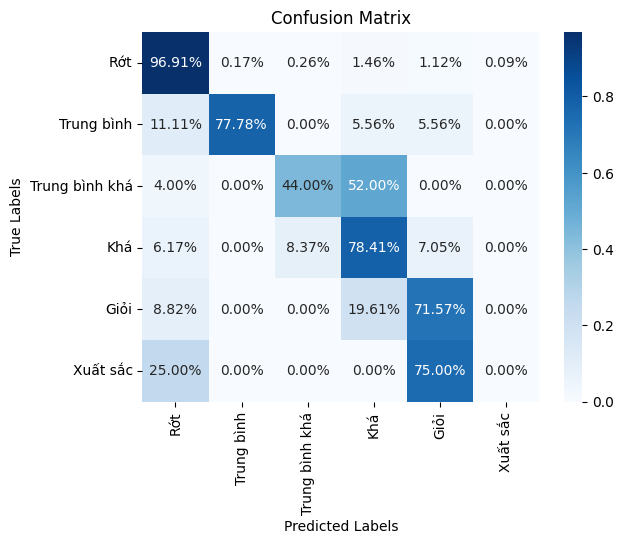

In [13]:
visualization(y_test, y_pred_dt)

### b) Random Forest

In [14]:
model_rf = RandomForestClassifier(random_state=42)

In [15]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9231051101428176
Macro f1_score:  0.6604369760666499
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.68      0.46      0.55        50
           3       0.77      0.88      0.82       227
           4       0.71      0.74      0.72       102
           5       0.00      0.00      0.00         4

    accuracy                           0.92      1566
   macro avg       0.67      0.66      0.66      1566
weighted avg       0.92      0.92      0.92      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

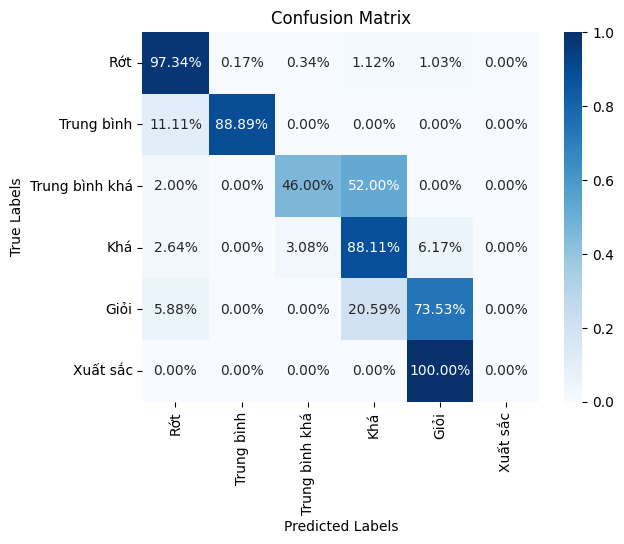

In [16]:
visualization(y_test, y_pred_rf)

### c) XGBoost

In [17]:
model_xg = XGBClassifier(random_state=42)

In [18]:
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9223389255438723
Macro f1_score:  0.7069123199099959
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.88      0.83      0.86        18
           2       0.65      0.48      0.55        50
           3       0.77      0.85      0.81       227
           4       0.72      0.81      0.76       102
           5       0.33      0.25      0.29         4

    accuracy                           0.92      1566
   macro avg       0.72      0.70      0.71      1566
weighted avg       0.92      0.92      0.92      1566



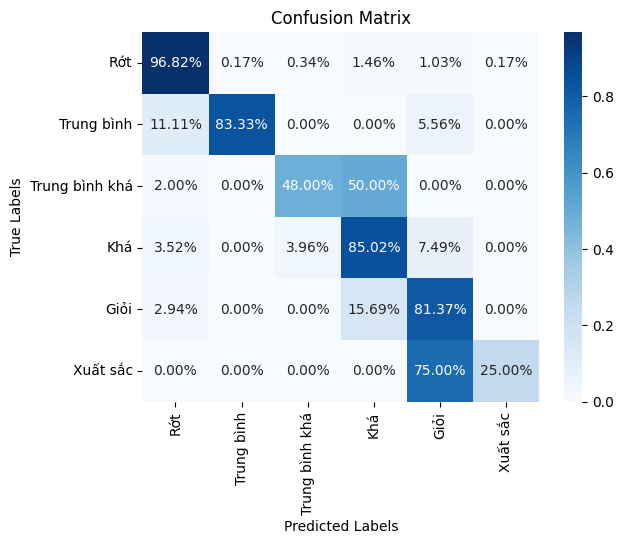

In [19]:
visualization(y_test, y_pred_xg)

### d) LightGBM

In [20]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [21]:
model_lgb.fit(X_train, y_train)
y_pred_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 22
[LightGBM] [Info] Start training from score -0.276878
[LightGBM] [Info] Start training from score -4.209336
[LightGBM] [Info] Start training from score -3.673031
[LightGBM] [Info] Start training from score -1.945112
[LightGBM] [Info] Start training from score -2.861402
[LightGBM] [Info] Start training from score -6.544711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

Weighted f1_score:  0.9229886960168083
Macro f1_score:  0.7223669315220641
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.88      0.78      0.82        18
           2       0.69      0.48      0.56        50
           3       0.77      0.85      0.81       227
           4       0.72      0.80      0.76       102
           5       1.00      0.25      0.40         4

    accuracy                           0.92      1566
   macro avg       0.84      0.69      0.72      1566
weighted avg       0.93      0.92      0.92      1566



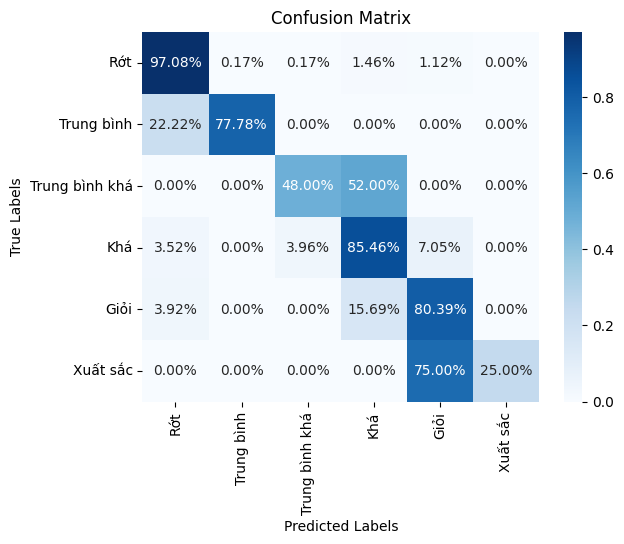

In [22]:
visualization(y_test, y_pred_lg)

### e) CatBoost

In [23]:
model_cb = CatBoostClassifier(random_state=42)

In [24]:
model_cb.fit(X_train, y_train)
y_pred_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.4695134	total: 208ms	remaining: 3m 27s
1:	learn: 1.2604999	total: 227ms	remaining: 1m 53s
2:	learn: 1.1076695	total: 245ms	remaining: 1m 21s
3:	learn: 0.9846324	total: 259ms	remaining: 1m 4s
4:	learn: 0.8865608	total: 272ms	remaining: 54.2s
5:	learn: 0.8061231	total: 285ms	remaining: 47.2s
6:	learn: 0.7380233	total: 298ms	remaining: 42.2s
7:	learn: 0.6799404	total: 310ms	remaining: 38.4s
8:	learn: 0.6264527	total: 340ms	remaining: 37.5s
9:	learn: 0.5853458	total: 358ms	remaining: 35.4s
10:	learn: 0.5437433	total: 372ms	remaining: 33.4s
11:	learn: 0.5085904	total: 390ms	remaining: 32.1s
12:	learn: 0.4774350	total: 405ms	remaining: 30.8s
13:	learn: 0.4487105	total: 426ms	remaining: 30s
14:	learn: 0.4242431	total: 443ms	remaining: 29.1s
15:	learn: 0.4033377	total: 458ms	remaining: 28.2s
16:	learn: 0.3810687	total: 477ms	remaining: 27.6s
17:	learn: 0.3608655	total: 491ms	remaining: 26.8s
18:	learn: 0.3437379	total: 507ms	remaining: 26.2s
19:	learn:

Weighted f1_score:  0.9208234901151578
Macro f1_score:  0.7048654255084924
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.88      0.78      0.82        18
           2       0.60      0.52      0.56        50
           3       0.78      0.85      0.81       227
           4       0.68      0.76      0.72       102
           5       0.50      0.25      0.33         4

    accuracy                           0.92      1566
   macro avg       0.74      0.69      0.70      1566
weighted avg       0.92      0.92      0.92      1566



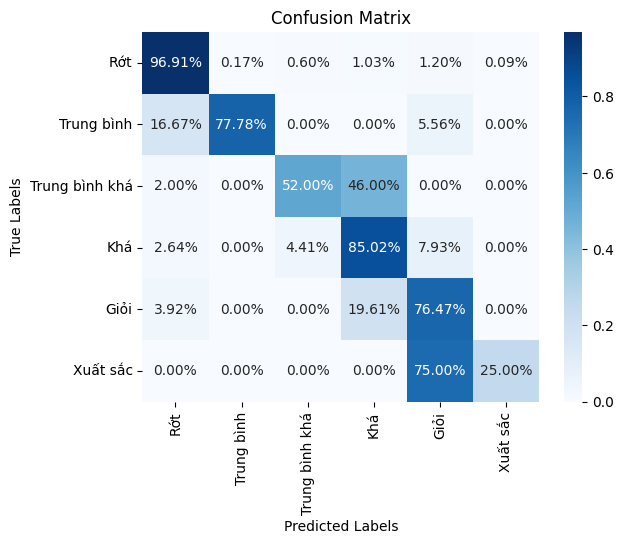

In [25]:
visualization(y_test, y_pred_cb)

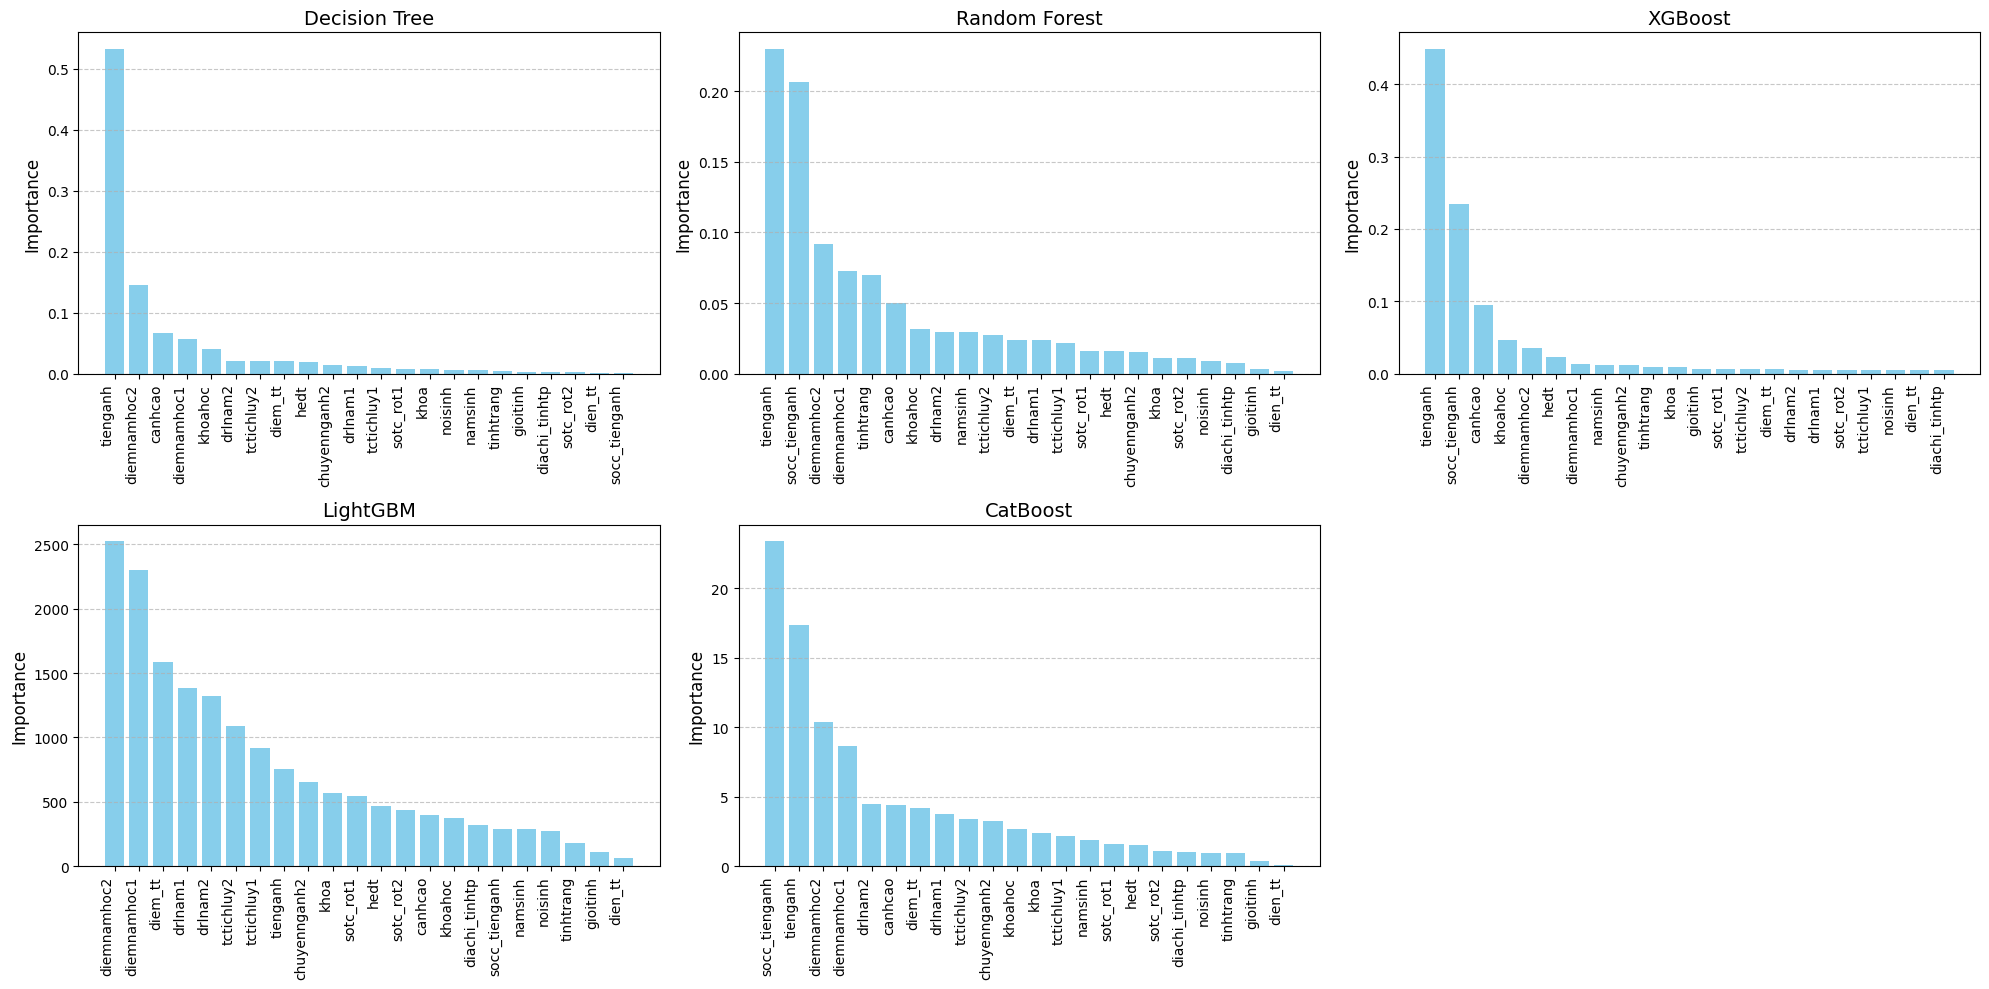

In [26]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# IV. Xây dựng mô hình với cân bằng nhãn

## 1. Sử dụng SMOTE

In [27]:
k_neighbors_config = {
    5: 2,  
    1: 5,  
    2: 7, 
    3: 10, 
    4: 10
}

smote_dict = {}
for label, k_neighbors in k_neighbors_config.items():
    smote_dict[label] = SMOTE(k_neighbors=k_neighbors)

X_train_resampled, y_train_resampled = X_train, y_train
for label, smote in smote_dict.items():
    if label in k_neighbors_config:
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

In [28]:
#smote = SMOTE(k_neighbors=5, random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [29]:
y_train_resampled.value_counts()

0    4746
3    4746
1    4746
2    4746
4    4746
5    4746
Name: xeploai, dtype: int64

### 1.1 Xét năm học đầu

#### a) Decision Tree

In [30]:
model_dt = DecisionTreeClassifier(random_state=42)

In [31]:
model_dt.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_dt = model_dt.predict(X_test)

Weighted f1_score:  0.9058730643847408
Macro f1_score:  0.6733634946939332
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.49      0.42      0.45        50
           3       0.72      0.78      0.75       227
           4       0.64      0.75      0.69       102
           5       0.25      0.25      0.25         4

    accuracy                           0.90      1566
   macro avg       0.66      0.68      0.67      1566
weighted avg       0.91      0.90      0.91      1566



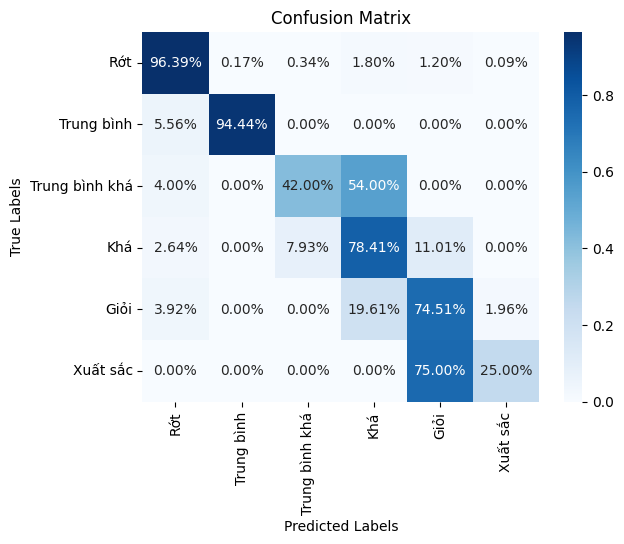

In [32]:
visualization(y_test, y_pred_resampled_dt)

#### b) Random Forest

In [33]:
model_rf = RandomForestClassifier(random_state=42)

In [34]:
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9220272921511564
Macro f1_score:  0.7177883461360874
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1165
           1       0.80      0.89      0.84        18
           2       0.67      0.56      0.61        50
           3       0.76      0.86      0.81       227
           4       0.68      0.80      0.74       102
           5       0.50      0.25      0.33         4

    accuracy                           0.92      1566
   macro avg       0.73      0.72      0.72      1566
weighted avg       0.93      0.92      0.92      1566



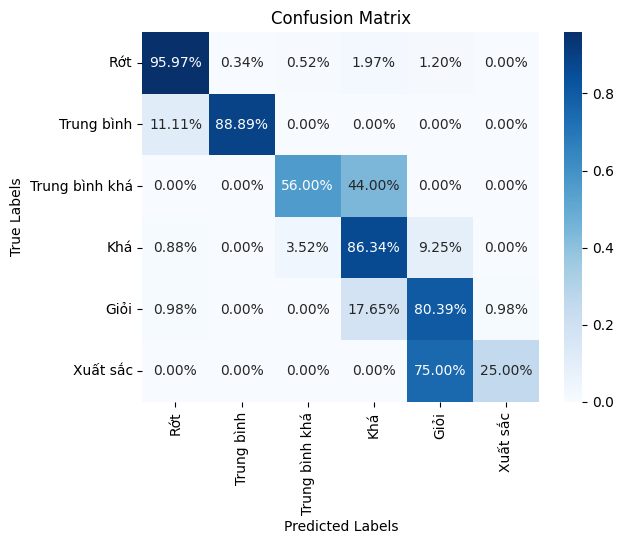

In [35]:
visualization(y_test, y_pred_resampled_rf)

#### c) XGBoost

In [36]:
model_xg = XGBClassifier(random_state=42)

In [37]:
model_xg.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9233430538584924
Macro f1_score:  0.7197859861591286
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.64      0.54      0.59        50
           3       0.78      0.85      0.81       227
           4       0.68      0.80      0.74       102
           5       0.33      0.25      0.29         4

    accuracy                           0.92      1566
   macro avg       0.72      0.72      0.72      1566
weighted avg       0.93      0.92      0.92      1566



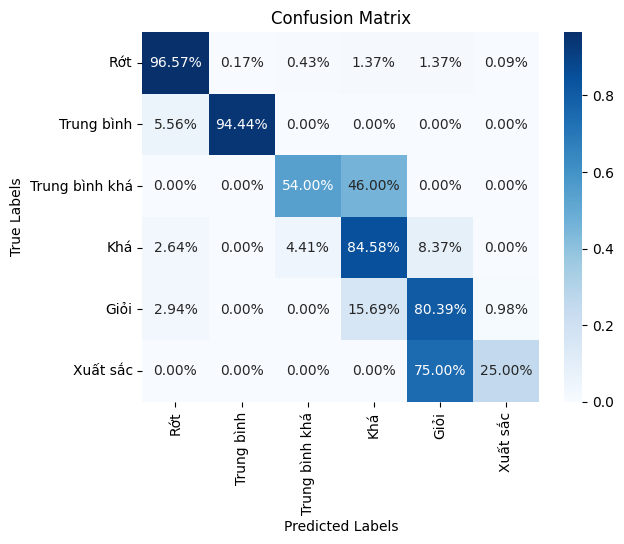

In [38]:
visualization(y_test, y_pred_resampled_xg)

#### d) LightGBM

In [39]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [40]:
model_lgb.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3632
[LightGBM] [Info] Number of data points in the train set: 28476, number of used features: 22
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Weighted f1_score:  0.9261671825374531
Macro f1_score:  0.7223898099390422
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.69      0.58      0.63        50
           3       0.79      0.85      0.82       227
           4       0.69      0.78      0.73       102
           5       0.33      0.25      0.29         4

    accuracy                           0.93      1566
   macro avg       0.73      0.72      0.72      1566
weighted avg       0.93      0.93      0.93      1566



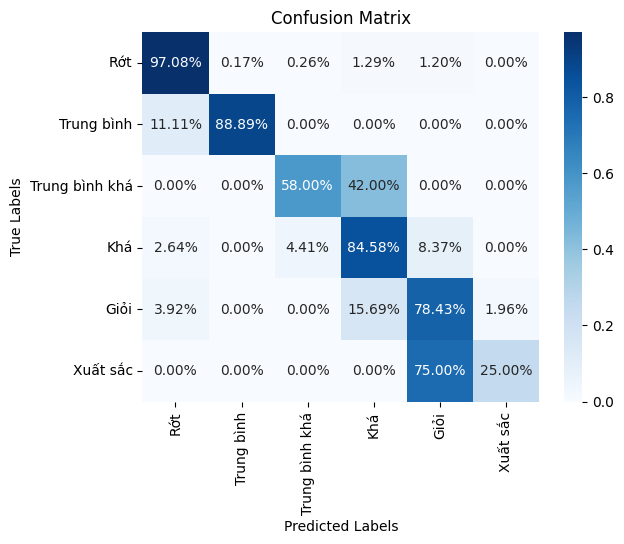

In [41]:
visualization(y_test, y_pred_resampled_lg)

#### e) CatBoost

In [42]:
model_cb = CatBoostClassifier(random_state=42)

In [43]:
model_cb.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_cb = model_cb.predict(X_test)

Learning rate set to 0.093865
0:	learn: 1.4302933	total: 39.4ms	remaining: 39.4s
1:	learn: 1.2099795	total: 67.7ms	remaining: 33.8s
2:	learn: 1.0536975	total: 100ms	remaining: 33.3s
3:	learn: 0.9354684	total: 130ms	remaining: 32.3s
4:	learn: 0.8386883	total: 158ms	remaining: 31.4s
5:	learn: 0.7612718	total: 189ms	remaining: 31.3s
6:	learn: 0.6940271	total: 216ms	remaining: 30.7s
7:	learn: 0.6400476	total: 241ms	remaining: 29.9s
8:	learn: 0.5930547	total: 272ms	remaining: 30s
9:	learn: 0.5525974	total: 302ms	remaining: 29.9s
10:	learn: 0.5150367	total: 340ms	remaining: 30.6s
11:	learn: 0.4828954	total: 374ms	remaining: 30.8s
12:	learn: 0.4550823	total: 405ms	remaining: 30.8s
13:	learn: 0.4298176	total: 436ms	remaining: 30.7s
14:	learn: 0.4078752	total: 467ms	remaining: 30.7s
15:	learn: 0.3880993	total: 503ms	remaining: 30.9s
16:	learn: 0.3698525	total: 530ms	remaining: 30.7s
17:	learn: 0.3528829	total: 560ms	remaining: 30.5s
18:	learn: 0.3379488	total: 597ms	remaining: 30.8s
19:	learn: 

Weighted f1_score:  0.9268429967125559
Macro f1_score:  0.7041194863062187
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1165
           1       0.73      0.89      0.80        18
           2       0.61      0.54      0.57        50
           3       0.80      0.87      0.83       227
           4       0.69      0.82      0.75       102
           5       0.33      0.25      0.29         4

    accuracy                           0.93      1566
   macro avg       0.69      0.72      0.70      1566
weighted avg       0.93      0.93      0.93      1566



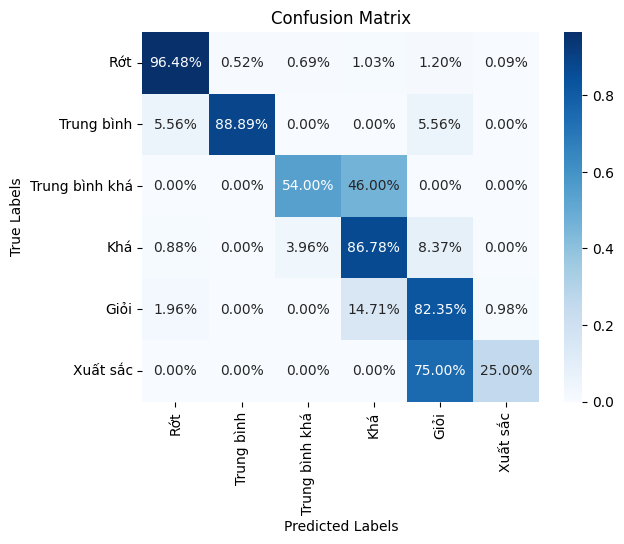

In [44]:
visualization(y_test, y_pred_resampled_cb)

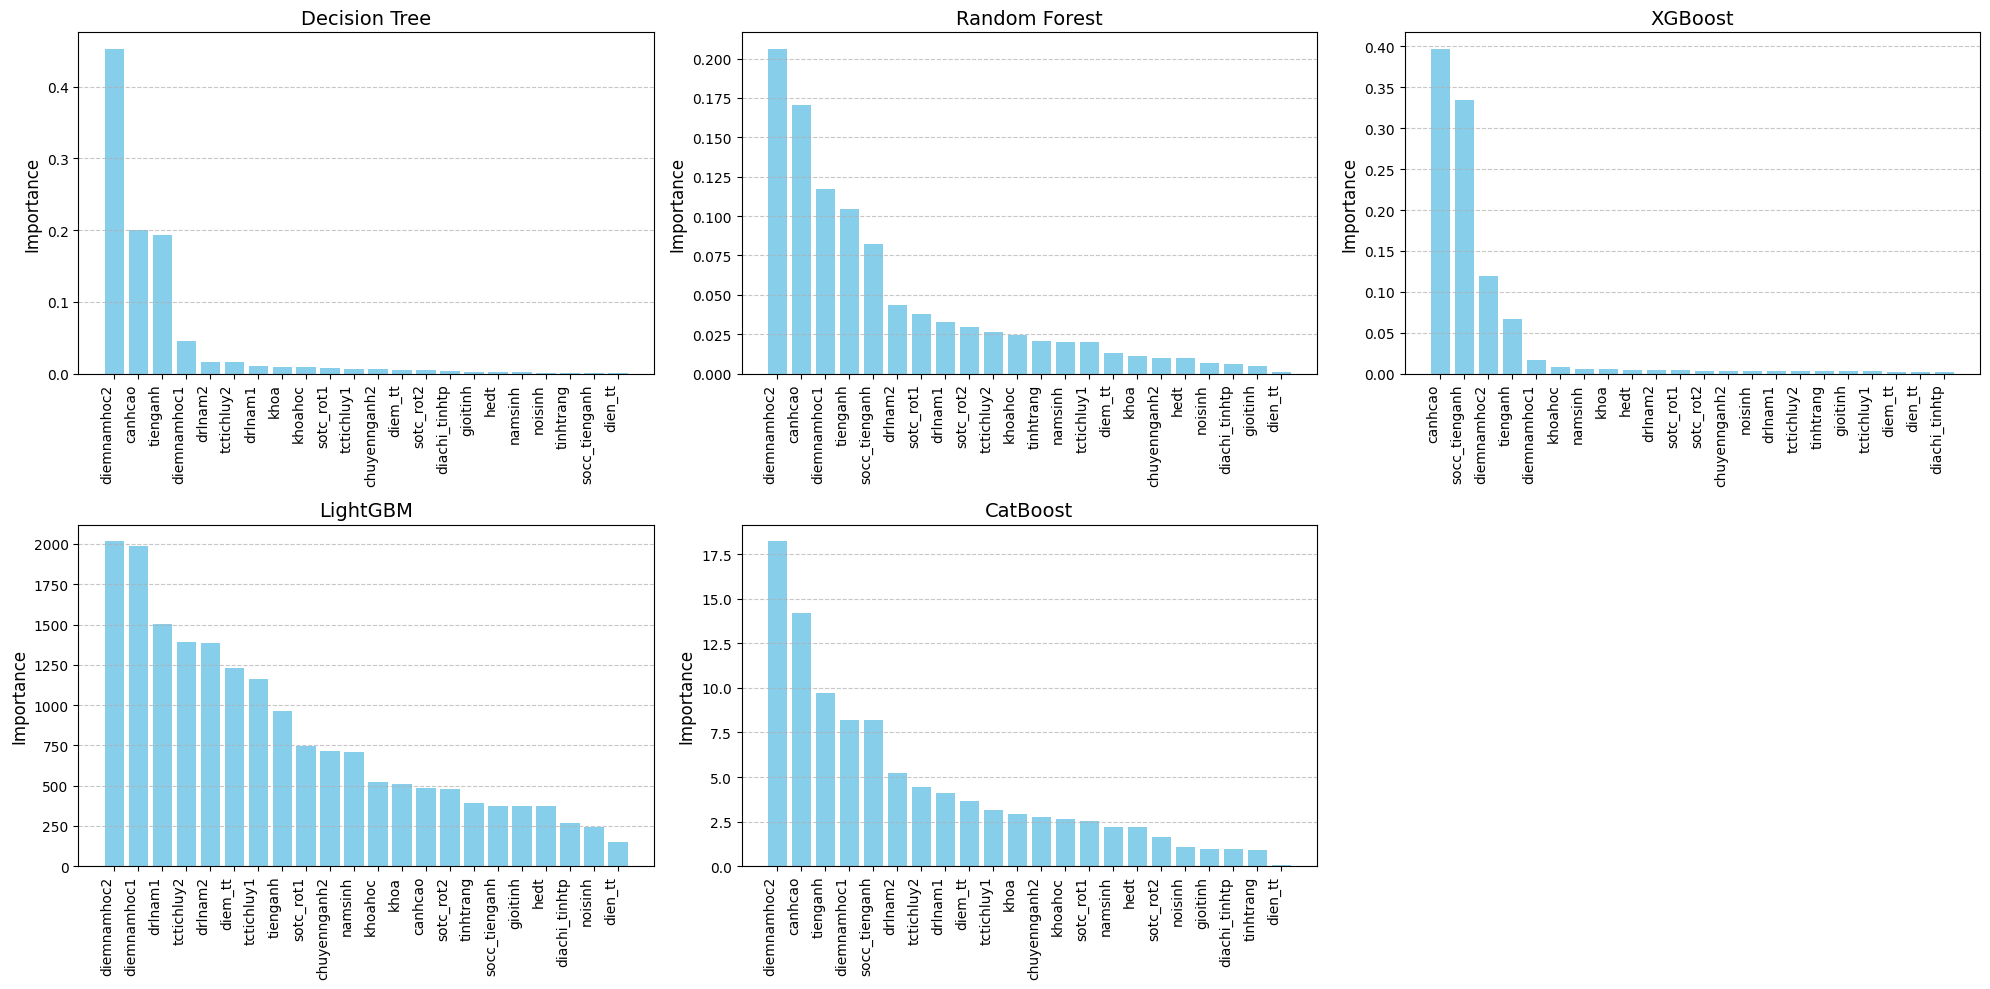

In [45]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train_resampled.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

## 2. Sử dụng đánh trọng số nhãn

In [46]:
y_train.value_counts()

0    4746
3     895
4     358
2     159
1      93
5       9
Name: xeploai, dtype: int64

In [47]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1, 2, 3, 4, 5]),
    y=y_train
)

In [48]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [49]:
class_weight_dict = {i: w for i, w in enumerate(class_weights)}
print("Trọng số nhãn:", class_weight_dict)

Trọng số nhãn: {0: 0.21983424638291896, 1: 11.21863799283154, 2: 6.561844863731656, 3: 1.1657355679702048, 4: 2.914338919925512, 5: 115.92592592592592}


### 2.1 Xét năm học đầu

#### a) Decision Tree

In [50]:
model_dt = DecisionTreeClassifier(class_weight=class_weight_dict, random_state=42)

In [51]:
model_dt.fit(X_train, y_train)
y_pred_ts_dt = model_dt.predict(X_test)

Weighted f1_score:  0.8962437888026664
Macro f1_score:  0.6194266550783311
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1165
           1       0.88      0.83      0.86        18
           2       0.58      0.42      0.49        50
           3       0.73      0.81      0.77       227
           4       0.66      0.62      0.64       102
           5       0.00      0.00      0.00         4

    accuracy                           0.90      1566
   macro avg       0.64      0.61      0.62      1566
weighted avg       0.90      0.90      0.90      1566



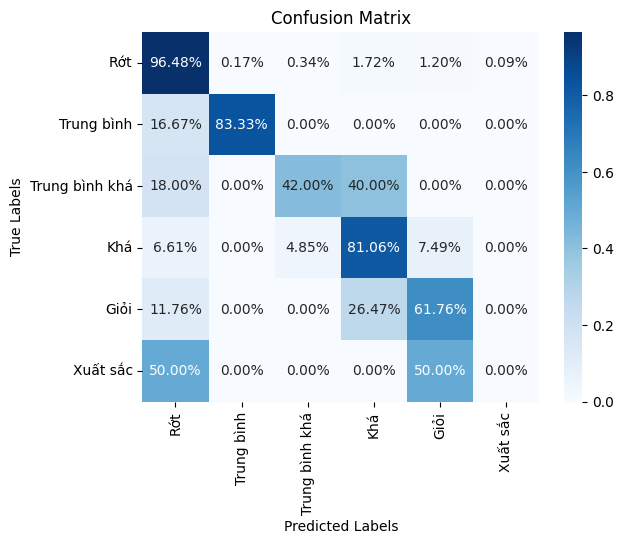

In [52]:
visualization(y_test, y_pred_ts_dt)

#### b) Random Forest

In [53]:
model_rf = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

In [54]:
model_rf.fit(X_train, y_train)
y_pred_ts_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9203720439440505
Macro f1_score:  0.7149590838578587
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.65      0.40      0.49        50
           3       0.75      0.88      0.81       227
           4       0.71      0.73      0.72       102
           5       1.00      0.25      0.40         4

    accuracy                           0.92      1566
   macro avg       0.83      0.69      0.71      1566
weighted avg       0.92      0.92      0.92      1566



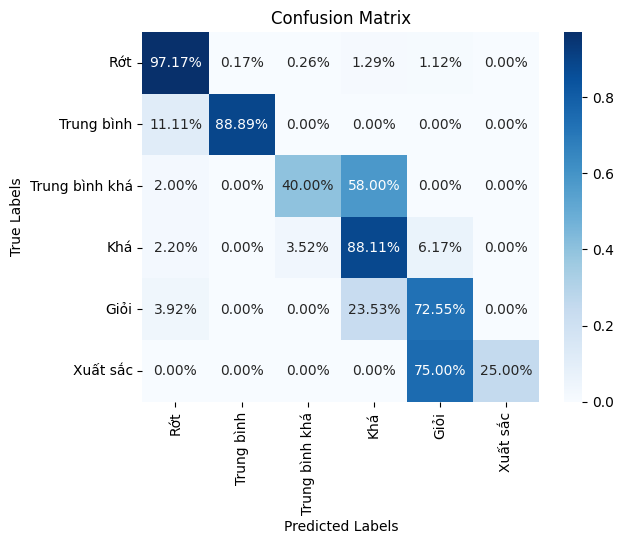

In [55]:
visualization(y_test, y_pred_ts_rf)

#### c) XGBoost

In [56]:
model_xg = XGBClassifier(random_state=42)

In [57]:
model_xg.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9255273784262137
Macro f1_score:  0.8049933359672902
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1165
           1       0.90      1.00      0.95        18
           2       0.62      0.58      0.60        50
           3       0.77      0.82      0.80       227
           4       0.69      0.84      0.76       102
           5       0.75      0.75      0.75         4

    accuracy                           0.92      1566
   macro avg       0.79      0.83      0.80      1566
weighted avg       0.93      0.92      0.93      1566



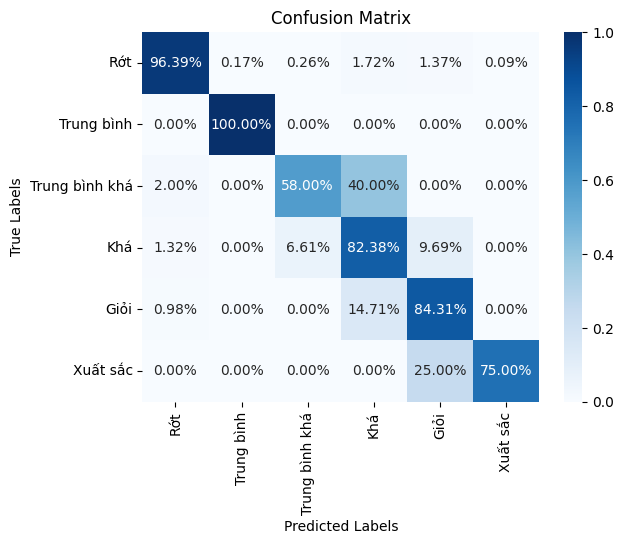

In [58]:
visualization(y_test, y_pred_ts_xg)

#### d) LightGBM

In [59]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [60]:
model_lgb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 22
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791760
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

Weighted f1_score:  0.9228908567524902
Macro f1_score:  0.7613655437262778
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.62      0.52      0.57        50
           3       0.76      0.85      0.80       227
           4       0.69      0.77      0.73       102
           5       0.67      0.50      0.57         4

    accuracy                           0.92      1566
   macro avg       0.77      0.76      0.76      1566
weighted avg       0.93      0.92      0.92      1566



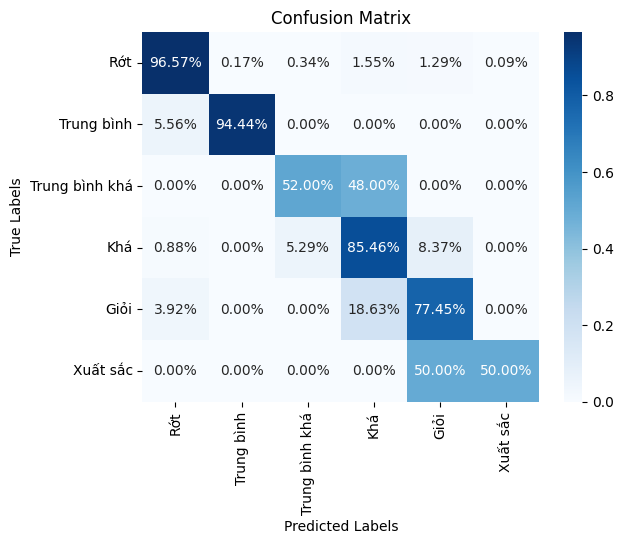

In [61]:
visualization(y_test, y_pred_ts_lg)

#### e) CatBoost

In [62]:
model_cb = CatBoostClassifier(random_state=42)

In [63]:
model_cb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.5857128	total: 41.2ms	remaining: 41.2s
1:	learn: 1.4253754	total: 54.3ms	remaining: 27.1s
2:	learn: 1.2775562	total: 76.8ms	remaining: 25.5s
3:	learn: 1.1770676	total: 89.3ms	remaining: 22.2s
4:	learn: 1.0747677	total: 101ms	remaining: 20s
5:	learn: 1.0079612	total: 113ms	remaining: 18.6s
6:	learn: 0.9357740	total: 122ms	remaining: 17.4s
7:	learn: 0.8793759	total: 130ms	remaining: 16.1s
8:	learn: 0.8225322	total: 142ms	remaining: 15.6s
9:	learn: 0.7697965	total: 155ms	remaining: 15.4s
10:	learn: 0.7396723	total: 179ms	remaining: 16.1s
11:	learn: 0.6942822	total: 191ms	remaining: 15.8s
12:	learn: 0.6623217	total: 205ms	remaining: 15.5s
13:	learn: 0.6214602	total: 233ms	remaining: 16.4s
14:	learn: 0.5881185	total: 244ms	remaining: 16s
15:	learn: 0.5616116	total: 257ms	remaining: 15.8s
16:	learn: 0.5382786	total: 270ms	remaining: 15.6s
17:	learn: 0.5158559	total: 281ms	remaining: 15.3s
18:	learn: 0.4977041	total: 292ms	remaining: 15.1s
19:	learn: 

Weighted f1_score:  0.9221397593319265
Macro f1_score:  0.7574692236115178
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1165
           1       0.69      1.00      0.82        18
           2       0.62      0.64      0.63        50
           3       0.77      0.85      0.81       227
           4       0.68      0.81      0.74       102
           5       0.67      0.50      0.57         4

    accuracy                           0.92      1566
   macro avg       0.74      0.79      0.76      1566
weighted avg       0.93      0.92      0.92      1566



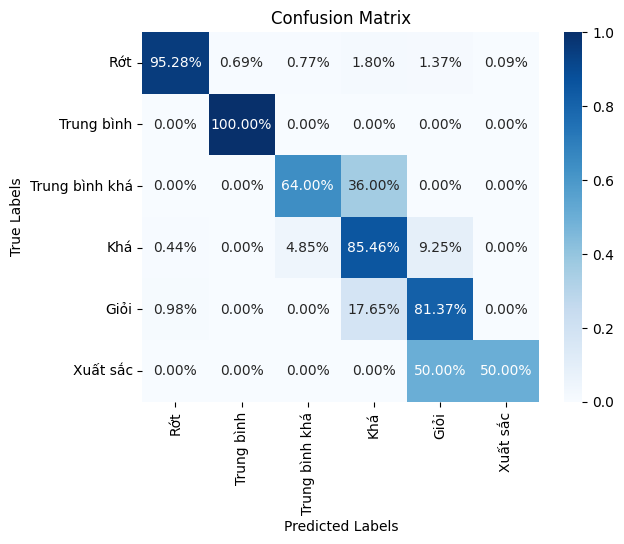

In [64]:
visualization(y_test, y_pred_ts_cb)

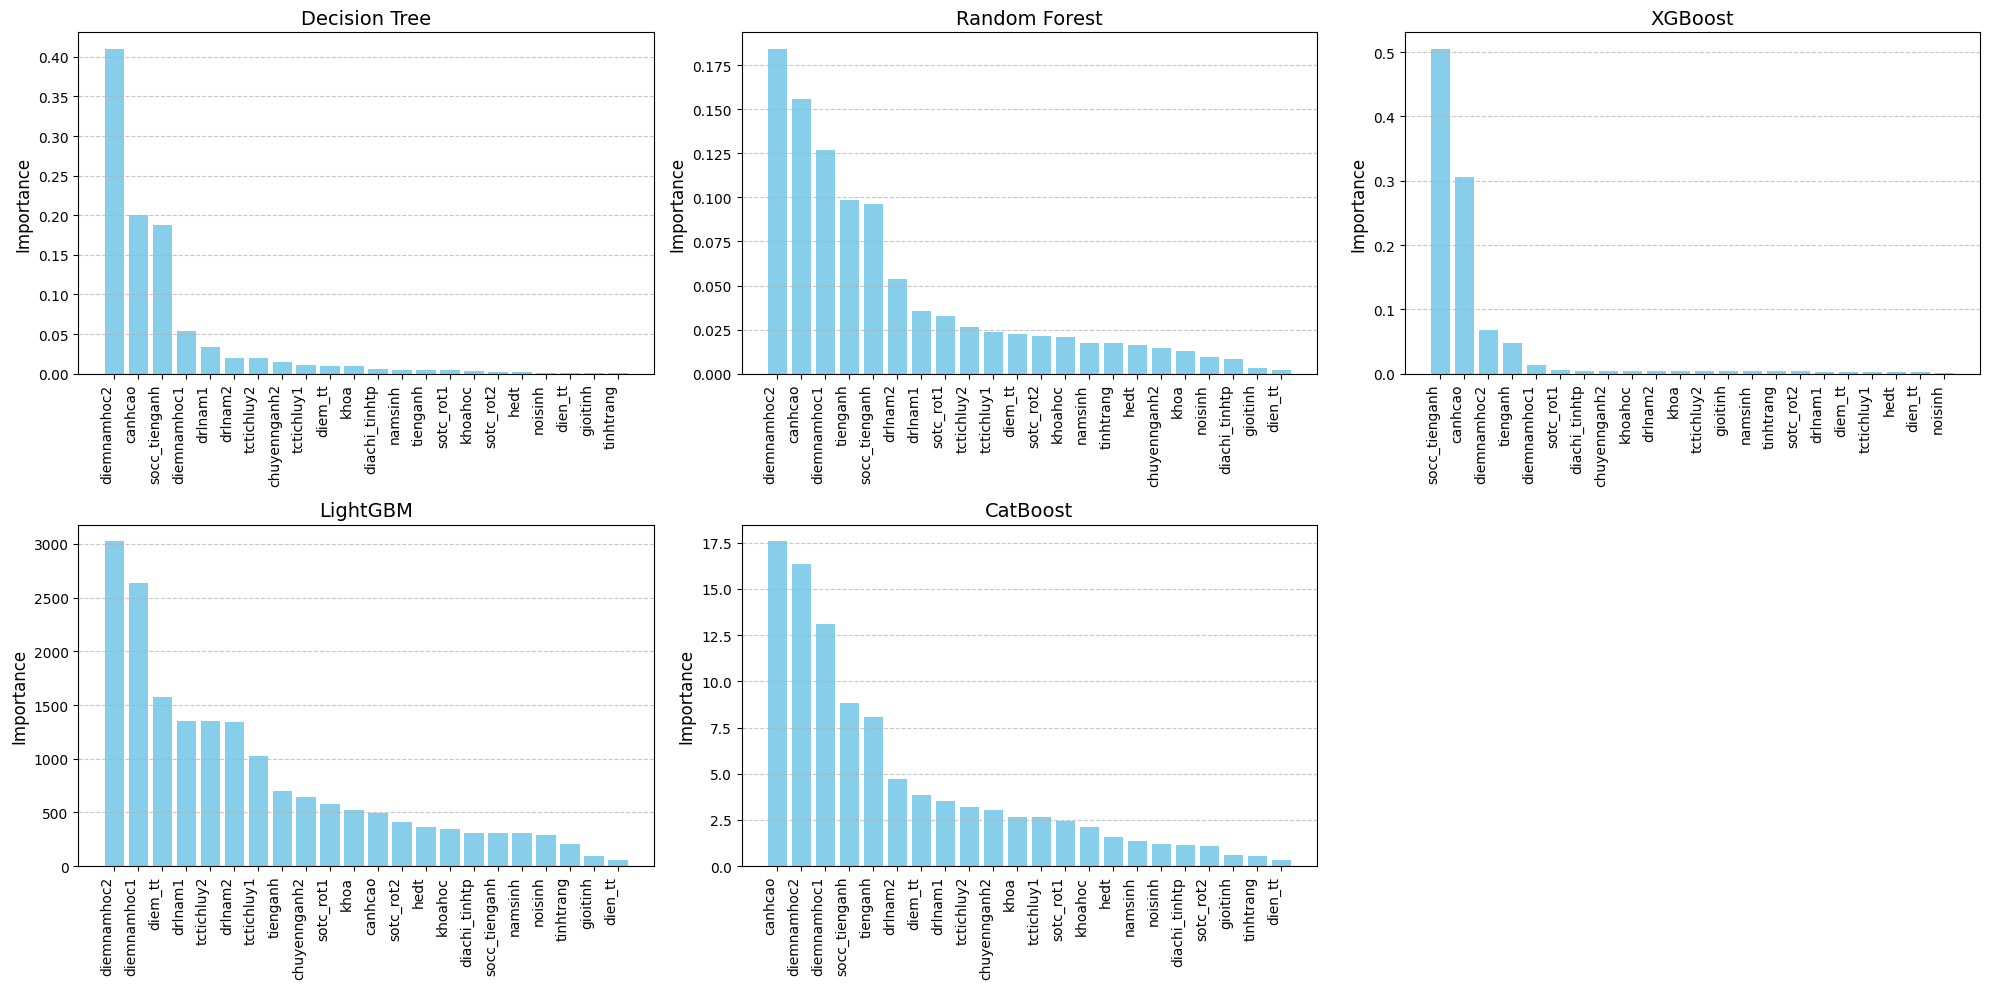

In [65]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# V. Kết quả

## 1. Không xử lý mất cân bằng

In [66]:
df_res = make_results_df(y_test, [y_pred_dt, y_pred_rf, y_pred_xg, y_pred_lg, y_pred_cb])

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
df_res

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.904215,0.629169,0.614451,0.620839
Random Forest,0.924649,0.672637,0.656438,0.660437
XGBoost,0.922095,0.722753,0.699253,0.706912
LightGBM,0.923372,0.838810,0.689523,0.722367
CatBoost,0.920179,0.738307,0.688634,0.704865


## 2. SMOTE

In [68]:
df_res_sm = make_results_df(y_test, [y_pred_resampled_dt, y_pred_resampled_rf, y_pred_resampled_xg, y_pred_resampled_lg, y_pred_resampled_cb])

In [69]:
df_res_sm

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.904215,0.664885,0.684605,0.673363
Random Forest,0.920179,0.733717,0.720984,0.717788
XGBoost,0.922095,0.720463,0.724974,0.719786
LightGBM,0.925287,0.729790,0.719972,0.722390
CatBoost,0.925287,0.693600,0.722511,0.704119


## 3. Đánh trọng số nhãn

In [70]:
df_res_ts = make_results_df(y_test, [y_pred_ts_dt, y_pred_ts_rf, y_pred_ts_xg, y_pred_ts_lg, y_pred_ts_cb])

In [71]:
df_res_ts

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.898467,0.636635,0.607727,0.619427
Random Forest,0.921456,0.830228,0.686185,0.714959
XGBoost,0.923372,0.787219,0.826812,0.804993
LightGBM,0.921456,0.770335,0.759874,0.761366
CatBoost,0.918902,0.737633,0.793523,0.757469
